Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

Dataset

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()
data.shape
data.describe()
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


0

In [ ]:
data["Month"] = pd.to_datetime(data["Month"], infer_datetime_format=True)

<ipython-input-10-795ac9392ff7>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["Month"] = pd.to_datetime(data["Month"], infer_datetime_format=True)


In [ ]:
data = data.set_index("Month", inplace=False)

<Axes: xlabel='Month'>

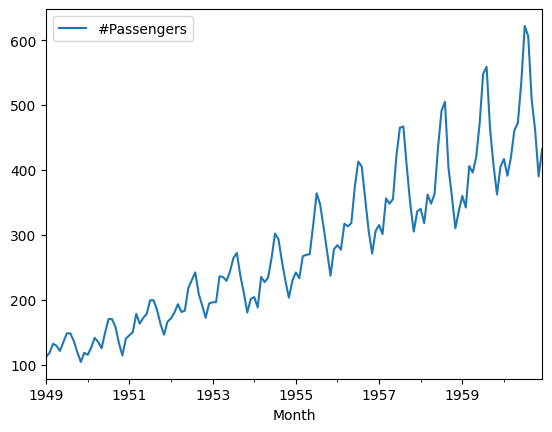

In [ ]:
data.plot()

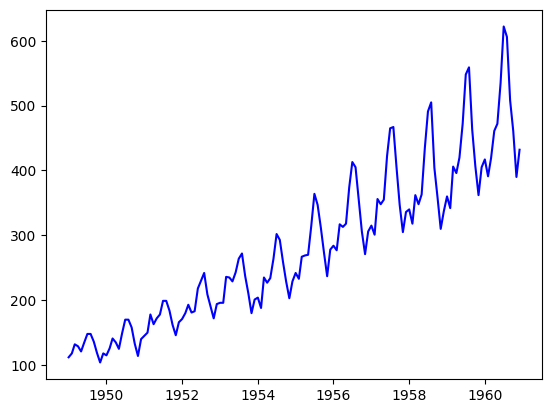

In [ ]:
plt.plot(data, color="blue", label="Original")

In [ ]:
mean_log = data.rolling(window=12).mean()  # yearly average
std_log = data.rolling(window=12).std()  # yearly diviation

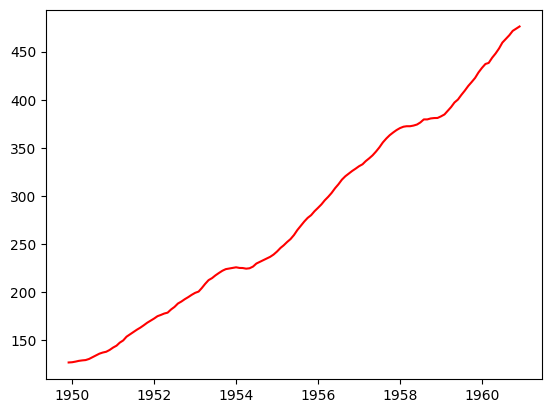

In [ ]:
plt.plot(mean_log, color="red", label="Rolling Mean")

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

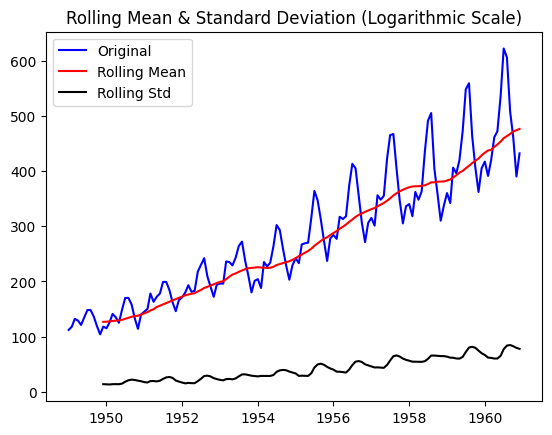

In [ ]:
plt.plot(data, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation (Logarithmic Scale)")

In [ ]:
result = adfuller(data["#Passengers"])
print(result[1])

0.991880243437641


<Axes: xlabel='Month'>

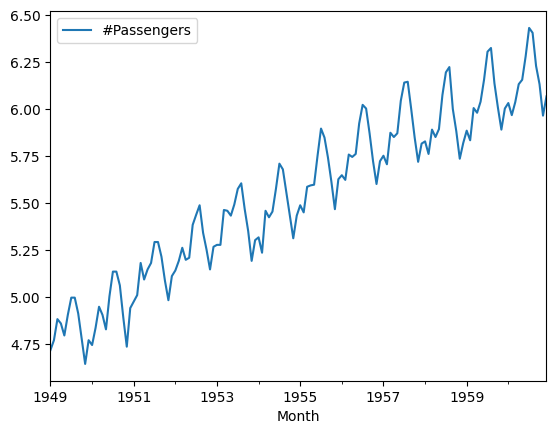

In [ ]:
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

In [ ]:
result = adfuller(first_log["#Passengers"])
print(result[1])

0.4223667747703902


In [ ]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

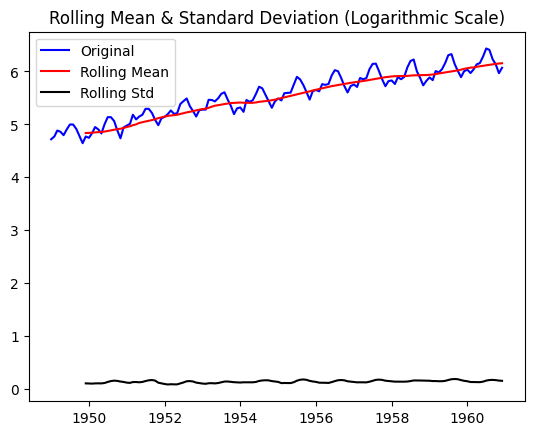

In [ ]:
plt.plot(first_log, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation (Logarithmic Scale)")

In [ ]:
mean_log.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
new_data = first_log - mean_log
new_data = new_data.dropna()  # precaution if any null value
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
result = adfuller(new_data["#Passengers"])
print(result[1])

0.022234630001242737


In [ ]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

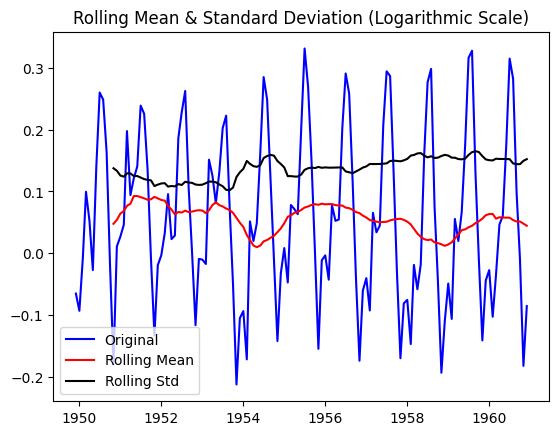

In [ ]:
plt.plot(new_data, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log, color="black", label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation (Logarithmic Scale)")

In [ ]:
result = adfuller(new_data["#Passengers"])
print(result[1])

0.022234630001242737


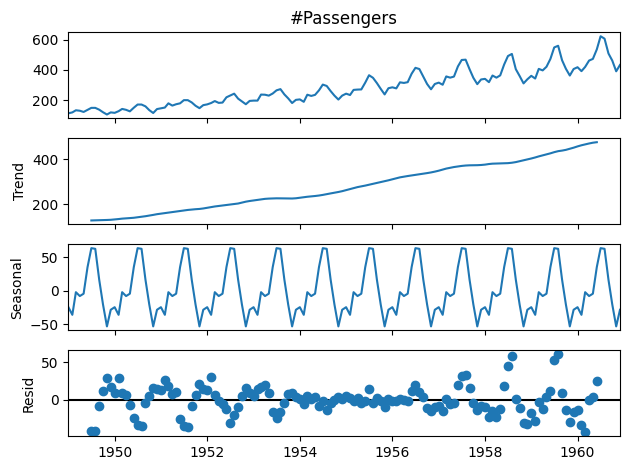

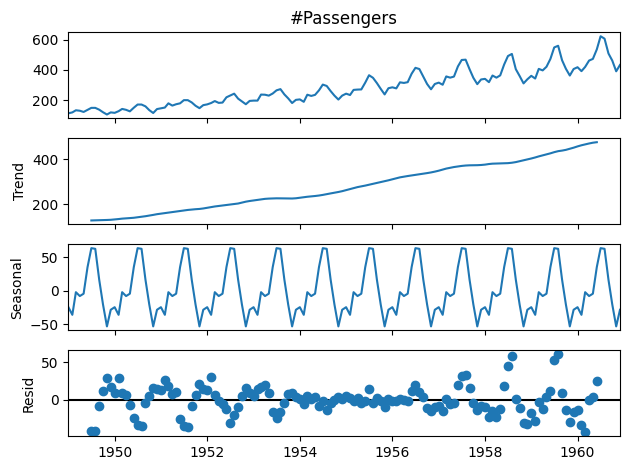

In [ ]:
old_decompose_result = seasonal_decompose(data["#Passengers"].dropna())
old_decompose_result.plot()

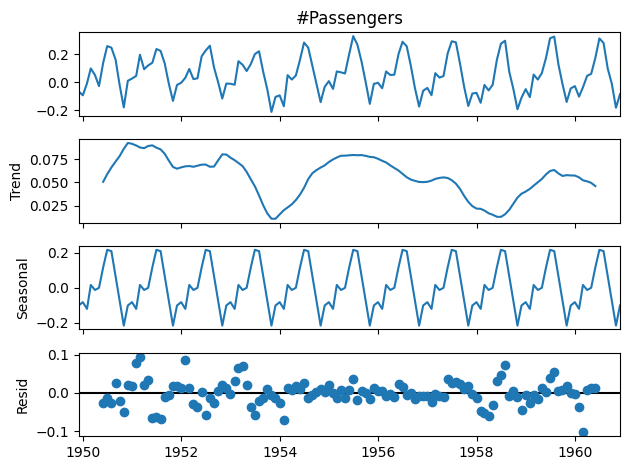

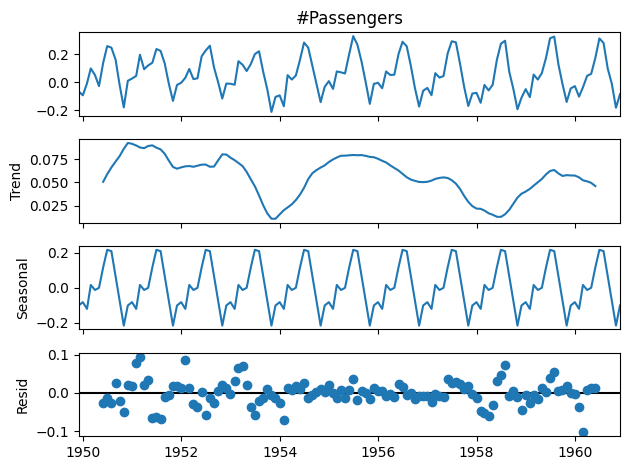

In [ ]:
decompose_result = seasonal_decompose(new_data["#Passengers"].dropna())
decompose_result.plot()

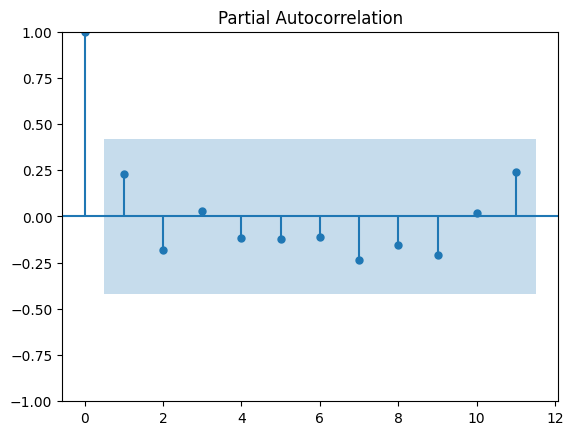

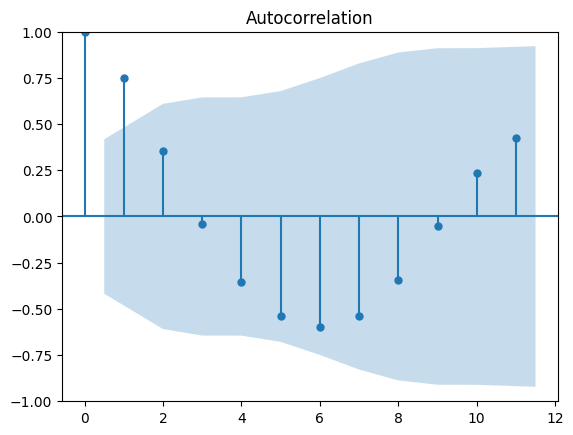

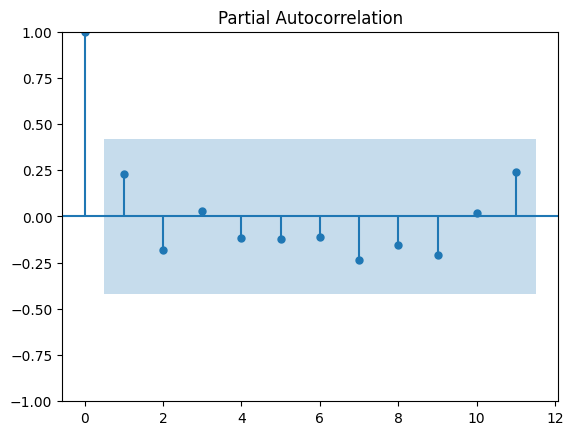

In [ ]:
acf_plot = acf(new_data)
pacf_plot = pacf(new_data)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

ARIMA

In [ ]:
train = new_data.iloc[:120]["#Passengers"]
test = new_data.iloc[121:]["#Passengers"]

In [ ]:
model = auto_arima(
    train,
    start_p=0,
    max_p=5,
    start_q=0,
    max_q=5,
    d=None,  # Let it determine the best differencing
    seasonal=False,  # Set to True and provide `m` if seasonal
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

print(model.summary())

c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-120.730, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-209.363, Time=0.16 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-212.416, Time=1.07 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-224.595, Time=1.16 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-227.010, Time=3.24 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-227.022, Time=1.60 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-225.872, Time=0.87 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-230.572, Time=2.85 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-235.109, Time=8.25 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-227.430, Time=2.54 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-233.126, Time=1.90 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-232.804, Time=0.53 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-233.380, Time=0.43 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-227.503, Time=0.14 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-231.162, Time=0.62 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-245.482, Time=0.44 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-247.038, Time=5.46 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-248.894, Time=2.55 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-227.607, Time=0.65 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-232.727, Time=0.42 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-227.267, Time=0.23 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-210.206, Time=0.21 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-225.803, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-233.787, Time=0.20 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-255.482, Time=0.54 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-254.387, Time=0.65 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-244.400, Time=0.57 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec


c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-253.575, Time=0.58 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0] intercept
Total fit time: 39.058 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 134.741
Date:                Sat, 07 Jun 2025   AIC                           -255.482
Time:                        13:48:17   BIC                           -235.970
Sample:                    12-01-1949   HQIC                          -247.558
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0257      0.007      3.935      0.000       0.013

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

train = new_data.iloc[:120]["#Passengers"]
test = new_data.iloc[121:]["#Passengers"]

model = sm.tsa.arima.ARIMA(train, order=(3, 0, 2))
model_fit = model.fit()
model_fit.summary()

c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ab

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 134.727
Date:                Sat, 07 Jun 2025   AIC                           -255.453
Time:                        13:49:22   BIC                           -235.941
Sample:                    12-01-1949   HQIC                          -247.529
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0563      0.006      8.963      0.000       0.044       0.069
ar.L1          0.7852      0.151      5.202      0.000       0.489       1.081
ar.L2          0.2856      0.186      1.532      0.125      -0.080       0.651
ar.L3         -0.5321      0.120     -4.443      0.000      -0.767      -0.297
ma.L1          0.1277      0.122      1.044      0.297      -0.112       0.368
ma.L2         -0.7499      0.093     -8.058      0.000      -0.932      -0.567
sigma2         0.0061      0.001      5.415      0.000       0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.85
Prob(Q):                              0.53   Prob(JB):                         0.15
Heteroskedasticity (H):               0.98   Skew:                             0.11
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

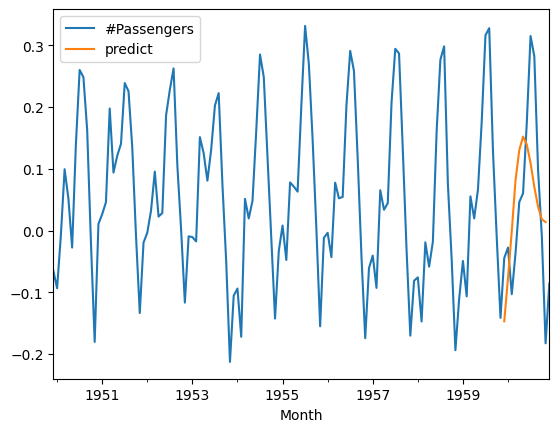

In [ ]:
new_data["predict"] = model_fit.predict(
    start=len(train), end=len(train) + len(test) - 1, dynamic=True
)
new_data[["#Passengers", "predict"]].plot()

SEAONAL ARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(3, 0, 2), seasonal_order=(3, 0, 2, 6))
model = model.fit()

c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\abali\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

<Axes: xlabel='Month'>

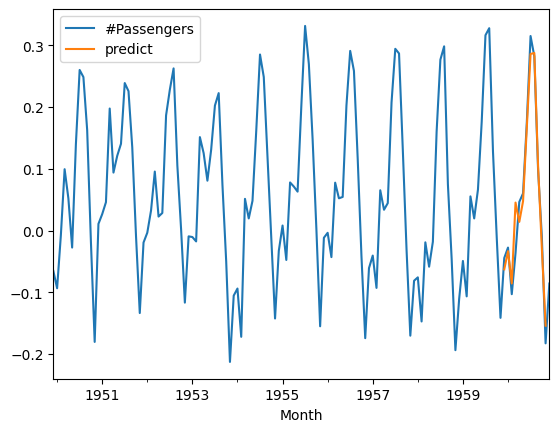

In [ ]:
new_data["predict"] = model.predict(
    start=len(train), end=len(train) + len(test) - 1, dynamic=True
)
new_data[["#Passengers", "predict"]].plot()

<Axes: xlabel='Month'>

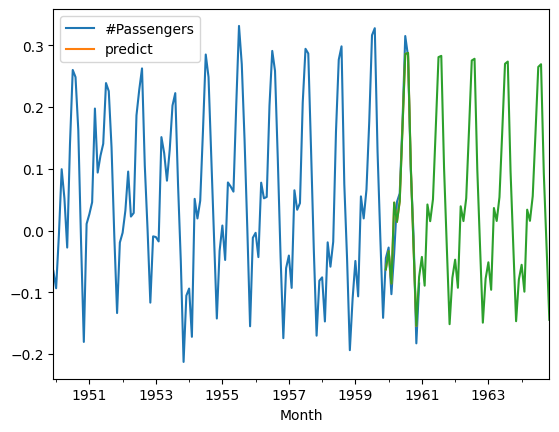

In [ ]:
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()